In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def pca_fit(X,n_components):
    mean=np.mean(X,axis=0)
    X=X-mean
    cov=np.cov(X.T)
    eigenvectors,eigenvalues=np.linalg.eig(cov)
    eigenvectors=eigenvectors.T
    idxs=np.argsort(eigenvalues)[::-1]
    eigenvalues=eigenvalues[idxs]
    eigenvectors=eigenvectors[idxs]
    components=eigenvectors[:n_components]
    return mean,components

In [24]:
def pca_transform(X,mean,components):
    X=X-mean
    return np.dot(X,components.T)

In [30]:
def draw_projection_lines(X,mean,components):
    projections=pca_transform(X,mean,components)
    for i in range(len(X)):
        plt.plot([X[i,0],projections[i,0]],[X[i,1],projections[i,1]],'k--',alpha=0.5)

In [ ]:
x=[2,3,4,5,6,7]
y=[1,5,3,6,7,8]
X_main=np.column_stack((x,y))

mean,components=pca_fit(X_main,2)
X_transformed=pca_transform(X_main,mean,components)

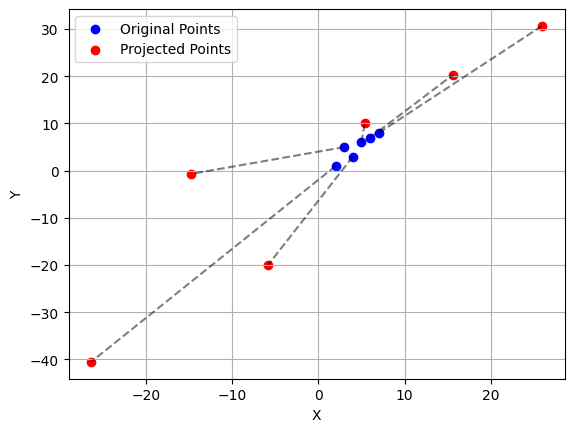

In [33]:
plt.scatter(X_main[:,0],X_main[:,1],color='blue',label='Original Points')
plt.scatter(X_transformed[:,0],X_transformed[:,1],color='red',label='Projected Points')
draw_projection_lines(X_main,mean,components)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()